**Step 1: Import Libraries & Load Dataset**

In [2]:
# Install missing libraries (if running in a new Colab environment)
# Uncomment below if openpyxl is not installed for reading Excel files
#!pip install openpyxl

# Import basic libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import libraries for machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [4]:
# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Read the uploaded Excel file (update filename if different)
df = pd.read_excel('heart_disease.xlsx',sheet_name=1)

In [10]:
# Show first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


 **Step 2: Exploratory Data Analysis (EDA)**

2.1 Check Dataset Info and Missing Values

In [11]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
# Check for missing values in each column
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


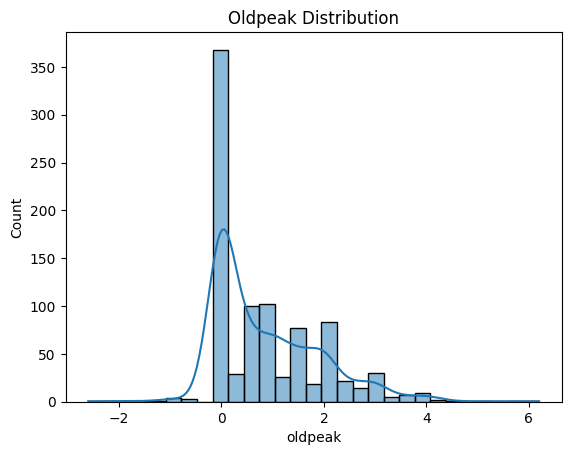

In [17]:
# Visualize distribution to decide imputation strategy
sns.histplot(df['oldpeak'], kde=True)
plt.title('Oldpeak Distribution')
plt.show()

In [18]:
# Fill missing values in 'oldpeak' (choose median or mean based on distribution)
#If Distribution is Skewed: use median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

In [20]:
# Check for missing values in each column
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


2.2 Summary Statistics

In [19]:
# Display descriptive statistics for numerical columns
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


2.3 Visualize Distribution of Features

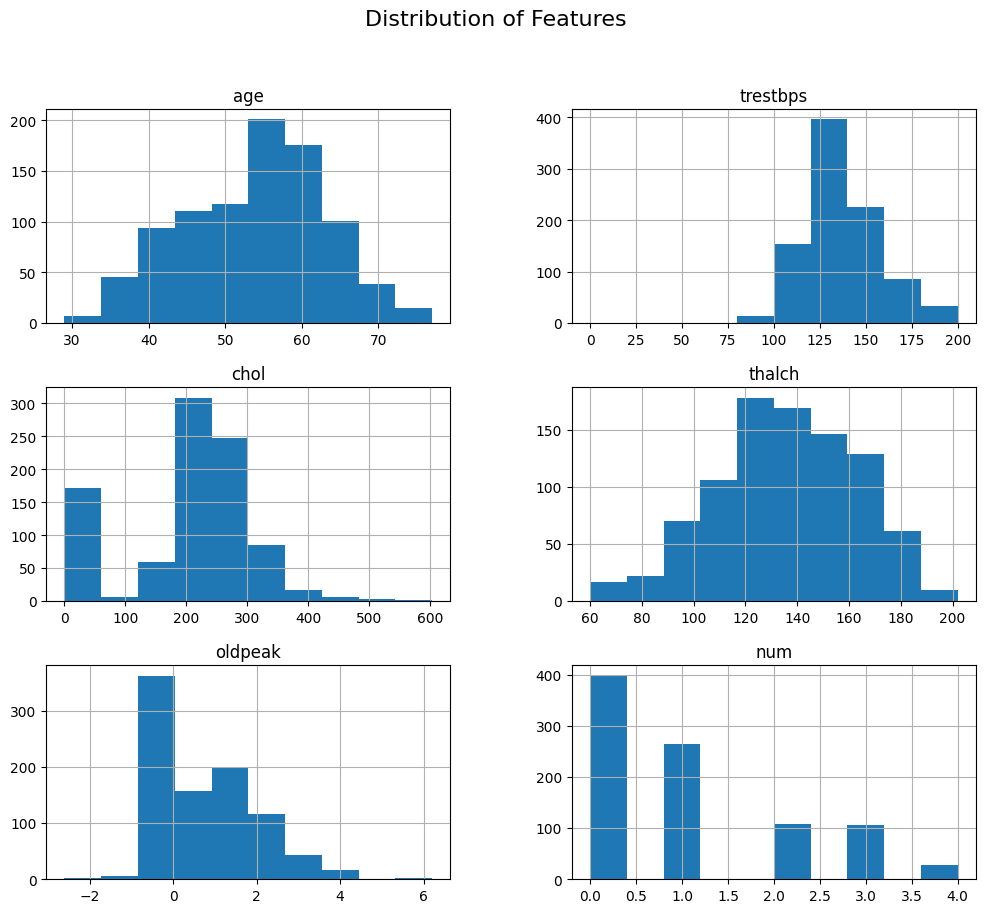

In [21]:
# Plot histograms for all numeric features
df.hist(figsize=(12, 10))
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

2.4 Detect Outliers Using Boxplots

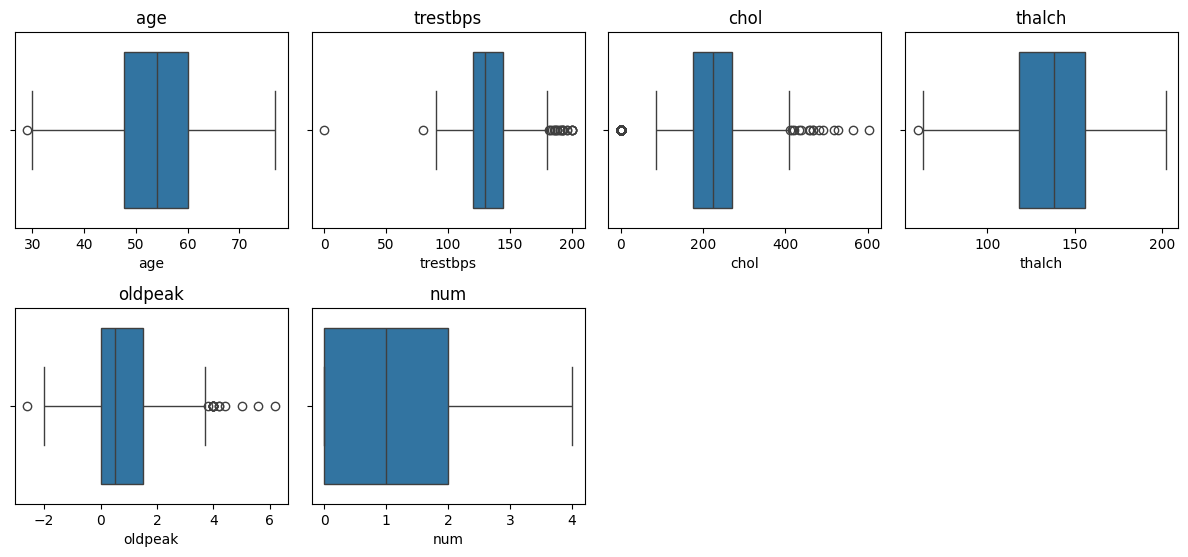

In [22]:
# Boxplots to visualize outliers in numeric features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

2.5 Correlation Heatmap

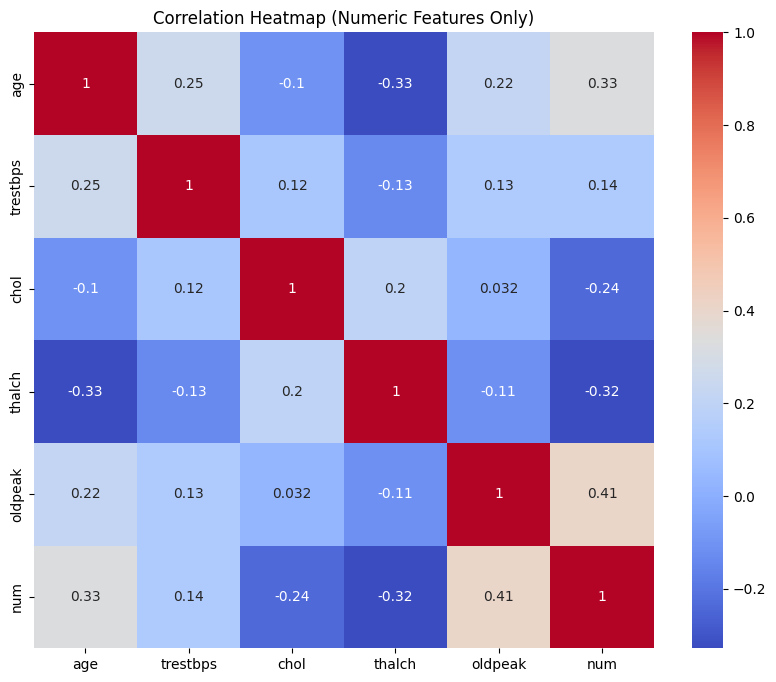

In [25]:
# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix heatmap for numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

**Step 3: Feature Engineering**

3.1 Encode Categorical Variables (if any)

In [26]:
# Find categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols.tolist())

Categorical Columns: ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


In [30]:
#Columns fbs and exang are Boolean, so convert them before encoding:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Convert boolean columns to string
for col in ['fbs', 'exang']:
    df[col] = df[col].astype(str)

In [29]:
# Encode categorical columns using LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert all to string to avoid mixed types

In [31]:
# Check updated dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


**Step 4: Decision Tree Classification**

4.1 Define Features & Target and Split the Data

In [33]:
# Features and target split
X = df.drop('num', axis=1)  # Features
y = df['num']               # Target variable

In [34]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

4.2 Train a Decision Tree Classifier

In [35]:
# Create Decision Tree model with default parameters
dt_model = DecisionTreeClassifier(random_state=42)

In [36]:
# Train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

4.3 Evaluate Model Performance

In [37]:
# Predict on the test data
y_pred = dt_model.predict(X_test)

In [41]:
# Print evaluation metrics
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall   :", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score :", metrics.f1_score(y_test, y_pred, average='macro'))
y_pred_proba = dt_model.predict_proba(X_test)  # 2D array #multiple classes like 0, 1, 2, 3, 4, then your target is multiclass.
print("ROC-AUC  :", metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))  # ovr: one-vs-rest

Accuracy : 0.4725274725274725
Precision: 0.3024681295715778
Recall   : 0.29704484195050235
F1-score : 0.299321432674771
ROC-AUC  : 0.5768344782873753


**Step 5: Hyperparameter Tuning (Grid Search)**

In [42]:
# Define a grid of parameters to try
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [43]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [44]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
# Show the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


5.2 Retrain the Model with Best Parameters

In [46]:
# Train new Decision Tree using best parameters
best_dt_model = grid_search.best_estimator_

In [47]:
# Make new predictions
y_pred_best = best_dt_model.predict(X_test)

In [49]:
# Evaluate tuned model
print("Tuned Accuracy :", metrics.accuracy_score(y_test, y_pred_best))
print("Tuned Precision:", metrics.precision_score(y_test, y_pred_best, average='macro'))
print("Tuned Recall   :", metrics.recall_score(y_test, y_pred_best, average='macro'))
print("Tuned F1-score :", metrics.f1_score(y_test, y_pred_best, average='macro'))
print("Tuned ROC-AUC  :", metrics.roc_auc_score(y_test, best_dt_model.predict_proba(X_test), multi_class='ovr'))

Tuned Accuracy : 0.5054945054945055
Tuned Precision: 0.24034920634920637
Tuned Recall   : 0.2831089193825043
Tuned F1-score : 0.25939356178608514
Tuned ROC-AUC  : 0.7030247481773191


**Step 6: Visualize the Decision Tree**

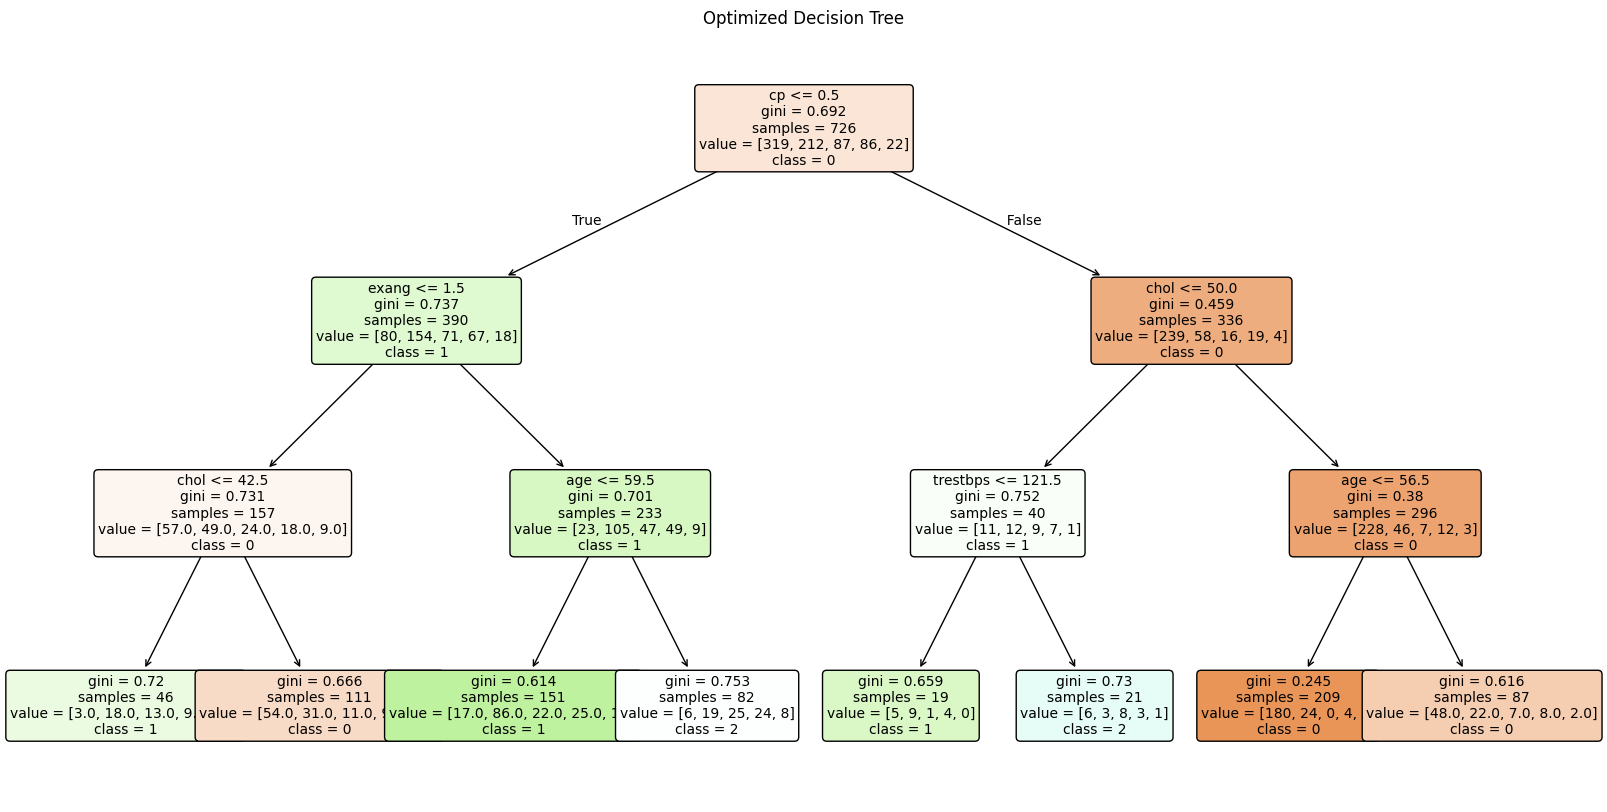

In [51]:
# Visualize the best decision tree model
# Automatically get class names from training data
class_names = [str(cls) for cls in best_dt_model.classes_]

# Now plot
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model,
          feature_names=X.columns,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Optimized Decision Tree")
plt.show()

**Step 7: Feature Importance Plot**

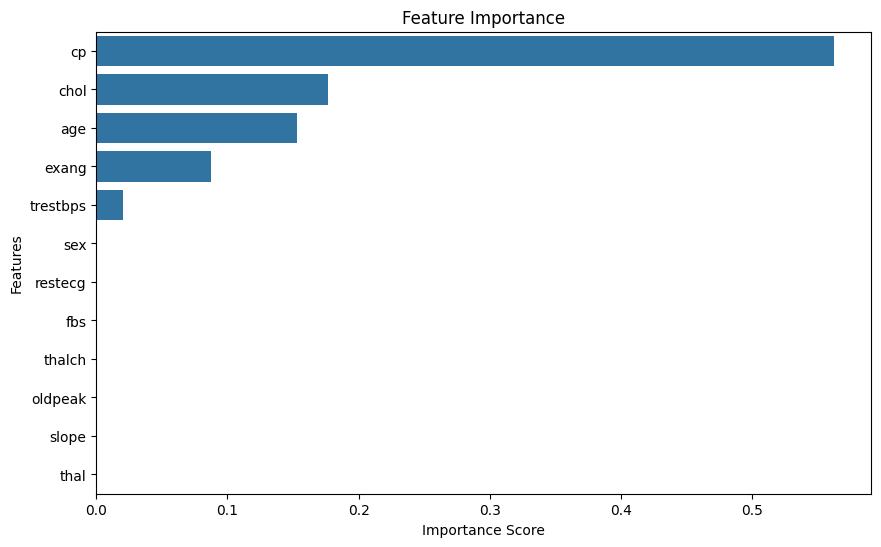

In [52]:
# Show feature importances
feat_importance = pd.Series(best_dt_model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Interview Questions:**

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

## 1. `criterion`
- **Purpose:** Specifies the function to measure the quality of a split.
- **Common values:** `'gini'`, `'entropy'`, `'log_loss'`.
- **Effect:**
  - `'gini'`: Uses Gini Impurity (faster, default).
  - `'entropy'`: Uses Information Gain (can result in deeper trees).
  - `'log_loss'`: Used for probabilistic splits.

---

## 2. `max_depth`
- **Purpose:** Sets the maximum depth of the tree.
- **Effect:**
  - Limits tree growth to prevent overfitting.
  - Smaller values → simpler model, less overfitting.
  - Larger values → more complex model, risk of overfitting.

---

## 3. `min_samples_split`
- **Purpose:** Minimum number of samples required to split an internal node.
- **Effect:**
  - Higher values prevent small, overfitted branches.
  - Example: `min_samples_split=10` means a node must have at least 10 samples to split.

---

## 4. `min_samples_leaf`
- **Purpose:** Minimum number of samples required at a leaf node.
- **Effect:**
  - Helps prevent leaves with very few samples.
  - Example: `min_samples_leaf=5` means each leaf must have at least 5 samples.

---

## 5. `max_features`
- **Purpose:** Number of features to consider when looking for the best split.
- **Effect:**
  - `'sqrt'`: Square root of total features (common in classification).
  - `'log2'`: Logarithm base 2 of total features.
  - Limits overfitting and speeds up training.

---

## 6. `splitter`
- **Purpose:** Strategy used to choose the split at each node.
- **Values:** `'best'` (default), `'random'`.
- **Effect:**
  - `'best'`: Chooses the best split.
  - `'random'`: Chooses the best from a random subset → adds randomness, can reduce overfitting.

---

## 7. `ccp_alpha` (Cost-Complexity Pruning)
- **Purpose:** Controls tree pruning by adding a penalty for tree complexity.
- **Effect:**
  - Higher `ccp_alpha` → simpler, more pruned tree.
  - Prevents overfitting.

---

### ✅ Summary

| Hyperparameter        | Controls                         | Impact on Overfitting |
|------------------------|----------------------------------|------------------------|
| `max_depth`            | Tree depth                      | Reduces if limited     |
| `min_samples_split`    | Min samples to split a node     | Reduces if increased   |
| `min_samples_leaf`     | Min samples in a leaf           | Reduces if increased   |
| `max_features`         | Features to consider for split | Reduces if limited     |
| `ccp_alpha`            | Complexity pruning              | Reduces if increased   |

---

➡️ **Proper tuning of these hyperparameters using GridSearchCV or RandomizedSearchCV improves model generalization.**


# 2. What is the difference between the Label encoding and One-hot encoding?

## ✅ Label Encoding

- **What it does:** Converts each category in a feature into a **unique integer**.
- **Example:**

| Color |
|------|
| Red  |
| Blue |
| Green|

**After Label Encoding:**

| Color |
|------|
| 0    |
| 1    |
| 2    |

- **Use Case:**
  - When the categorical variable is **ordinal (has an order)**, like: Low < Medium < High.
  - Some models (e.g., tree-based models) can work directly with label encoded variables.

- **Limitation:**
  - For **nominal categories** (no natural order), the integers may incorrectly imply an order or priority to the model.

---

## ✅ One-Hot Encoding

- **What it does:** Creates a **separate binary column for each category**, and assigns 1 or 0 to indicate presence.
- **Example:**

| Color |
|------|
| Red  |
| Blue |
| Green|

**After One-Hot Encoding:**

| Color_Red | Color_Blue | Color_Green |
|-----------|------------|-------------|
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |

- **Use Case:**
  - When the categorical variable is **nominal (no natural order)** like: Country, Color, City.
  - Recommended for algorithms that treat numeric values as ordered (e.g., Linear Regression, Logistic Regression, SVM).

- **Limitation:**
  - Can create **many columns** if the feature has lots of unique categories (**high dimensionality**).

---

## 🔍 Key Differences

| Feature                | Label Encoding                     | One-Hot Encoding                     |
|------------------------|------------------------------------|--------------------------------------|
| Output                 | Single column with integers        | Multiple binary columns              |
| Best for               | Ordinal data                       | Nominal data                         |
| Risk                   | May introduce false order          | No false order                       |
| Dimensionality         | Low                                | Can be high if many categories       |
| Model Compatibility    | Tree-based models                  | Linear models, distance-based models |

---

➡️ **Tip:** Use `pd.get_dummies()` for One-Hot Encoding and `LabelEncoder()` from `sklearn.preprocessing` for Label Encoding.



# 🙏 Thank You! 😊